In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit, GridSearchCV, RandomizedSearchCV
import nltk
from nltk import word_tokenize
import pandas as pd

# Getting a corpus

In [3]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))

# Small bag of words and TFIDF example

In [4]:
corpus = dataset.data[:30]
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2, max_features=20)
bows = count_vectorizer.fit_transform(corpus)
pd.DataFrame(bows.toarray(), columns=count_vectorizer.get_feature_names())

,24,com,edu,file,gm,gov,imagine,info,information,key,like,line,list,mail,message,phone,st,time,use,volume
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0
9,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0


In [5]:
corpus = dataset.data[:30]
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2, max_features=20)
bows = tfidf_vectorizer.fit_transform(corpus)
pd.DataFrame(bows.toarray(), columns=count_vectorizer.get_feature_names())

,24,com,edu,file,gm,gov,imagine,info,information,key,like,line,list,mail,message,phone,st,time,use,volume
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.449498,0.000000,0.000000,0.000000,0.491927,0.000000,0.449498,0.000000,0.000000,0.000000,0.449498,0.000000,0.000000,0.389696,0.00000
4,0.000000,0.000000,0.543319,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.685850,0.000000,0.000000,0.000000,0.484163,0.000000,0.00000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
6,0.000000,0.000000,0.000000,0.842643,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.538473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.627855,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.778331,0.00000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.875347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.483495,0.000000,0.00000


# Classifying topics

## Obtain labeled examples

In [6]:
num_of_features = 5000
num_of_examples = 10000

In [7]:
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2, max_features=num_of_features)

In [8]:
corpus = dataset.data[:num_of_examples]

In [9]:
print(corpus[100])


I've been a very intent NREN spectator of the NREN for years.  As a 
commercial IP software vendor, it really is my professional opinion that the 
NREN, at this point, is irrelevant to private sector networking.  If it had 
been deployed five years ago, it would have been a major development.  Now,
however, it's just an upgrade to the NSFnet, and an attempt to revive the 
lagging use of the national supercomputer centers.  You could cut out the 
NSFnet completely, and the Internet would continue chugging along without a 
hiccup (aside from a few universities).

Long-haul networking and Internet connectivity have long since ceased to be 
under federal sponsorship or regulation, at least in the USA.  The success of 
the CIX (Commercial Internet Exchange) is a prime example of this.  While our 
dear VP has been promoting his "data superhighway," the private sector has 
been building it, without the NSFnet's restrictions.

To illustrate, a connection from the machine on my desk to the mac

In [10]:
bows = count_vectorizer.fit_transform(corpus)
bows

<10000x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 442859 stored elements in Compressed Sparse Row format>

In [11]:
vocabulary = count_vectorizer.get_feature_names()
vocabulary

['00',
 '000',
 '005',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '0d',
 '0i',
 '0m',
 '0q',
 '0qax',
 '0t',
 '10',
 '100',
 '1000',
 '101',
 '102',
 '1024',
 '1024x768',
 '103',
 '104',
 '105',
 '106',
 '108',
 '109',
 '11',
 '110',
 '112',
 '117',
 '12',
 '120',
 '1200',
 '125',
 '127',
 '128',
 '129',
 '13',
 '130',
 '132',
 '133',
 '135',
 '13p',
 '13q',
 '14',
 '140',
 '144',
 '145',
 '146',
 '147',
 '149',
 '15',
 '150',
 '1542',
 '15o',
 '16',
 '160',
 '16m',
 '17',
 '170',
 '18',
 '180',
 '182',
 '19',
 '1914',
 '1915',
 '192',
 '1920',
 '1964',
 '1968',
 '1970',
 '1972',
 '1974',
 '1975',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '199',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1d',
 '1d9',
 '1d9l',
 '1eq',
 '1f',
 '1f9',
 '1mb',
 '1q',
 '1s',
 '1st',
 '1t',
 '1w',
 '1y',
 '1z4',
 '20',
 '200',
 '2000',
 '202',
 '205',
 '21',
 '210',
 '212',
 '213',
 '214',
 '22',
 '220',
 '225',
 '23'

In [12]:
bows[100]

<1x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 51 stored elements in Compressed Sparse Row format>

In [13]:
bows[100][bows[100].nonzero()]

matrix([[1, 1, 1, 2, 2, 1, 2, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1,
         1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1,
         1, 1, 1, 1, 1, 2, 1, 1, 1]])

In [14]:
[vocabulary[ind] for ind in bows[100].nonzero()[1]]

['just',
 'continue',
 'aside',
 'use',
 'years',
 'article',
 'machine',
 'software',
 'commercial',
 'data',
 'posted',
 'internet',
 'uk',
 'usa',
 'major',
 'ago',
 'example',
 'point',
 'long',
 'connection',
 'professional',
 'building',
 'vendor',
 'exchange',
 'really',
 'appropriate',
 'private',
 'national',
 'irrelevant',
 've',
 'cut',
 'development',
 'completely',
 'attempt',
 'hits',
 'intent',
 'ip',
 'opinion',
 'sector',
 'networking',
 'upgrade',
 'centers',
 'federal',
 'regulation',
 'success',
 'prime',
 'dear',
 'restrictions',
 'desk',
 'involves',
 'gateway']

In [15]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [16]:
targets = dataset.target[:num_of_examples]

In [17]:
targets[:10]

array([17,  0, 17, 11, 10, 15,  4, 17, 13, 12])

## Produce training and test data

In [18]:
test_proportion = 0.1
separating_index = int(len(targets) * (1-test_proportion))
X = bows[:separating_index]
y = targets[:separating_index]
X_test = bows[separating_index:]
y_test = targets[separating_index:]

In [19]:
X.shape, len(y), X_test.shape, len(y_test)

((9000, 5000), 9000, (1000, 5000), 1000)

## Classify and look at results

### Linear SVM
![title](SVM_hyperplanes.png)
![title](SVM_margin.png)

In [20]:
svc = svm.LinearSVC()
svc.fit(X, y)

/Users/apple/anaconda3/envs/summer_school/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [21]:
svc.predict(X_test[:20]), y_test[:20]

(array([ 4, 11,  8,  3,  5,  9, 13,  2,  9,  1, 13, 10,  7,  0, 17,  6,  6,
         6, 13, 16]),
 array([ 3, 10,  8,  3,  0,  9,  6,  3,  0,  1, 13, 10,  7, 14, 13,  6,  6,
         6, 13,  8]))

In [22]:
svc.score(X_test, y_test)

0.591

### Confusion matrix
https://en.wikipedia.org/wiki/Confusion_matrix

In [23]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, svc.predict(X_test))
#sum([confusion_matrix[i, i] for i in range(20)])
confusion_matrix[:15, :15]

array([[20,  0,  0,  1,  1,  1,  0,  0,  2,  1,  0,  2,  0,  1,  2],
       [ 0, 29,  0,  4,  3,  3,  1,  0,  0,  0,  0,  1,  1,  1,  1],
       [ 0,  2, 29,  3,  1,  3,  2,  0,  0,  2,  0,  0,  1,  0,  1],
       [ 0,  4,  6, 23,  8,  0,  1,  0,  0,  1,  0,  1,  3,  0,  0],
       [ 1,  0,  2,  4, 24,  1,  4,  0,  0,  6,  0,  0,  2,  1,  0],
       [ 2,  5,  5,  4,  0, 34,  0,  0,  2,  0,  0,  0,  1,  0,  0],
       [ 1,  2,  1,  3,  3,  0, 38,  2,  3,  2,  0,  0,  1,  2,  1],
       [ 2,  0,  0,  0,  0,  2,  1, 30,  5,  5,  1,  0,  0,  1,  1],
       [ 1,  0,  0,  1,  3,  0,  3,  5, 39,  0,  1,  0,  1,  3,  2],
       [ 0,  1,  0,  0,  0,  0,  0,  3,  0, 40,  2,  0,  1,  0,  1],
       [ 1,  0,  0,  1,  0,  0,  1,  2,  1,  5, 38,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  2,  1,  0,  0,  2,  0,  1, 34,  2,  2,  1],
       [ 2,  1,  2,  3,  7,  1,  1,  3,  0,  3,  0,  1, 26,  3,  1],
       [ 0,  0,  3,  2,  1,  1,  0,  1,  1,  2,  0,  0,  4, 41,  2],
       [ 2,  2,  1,  0,  2,  1,  0

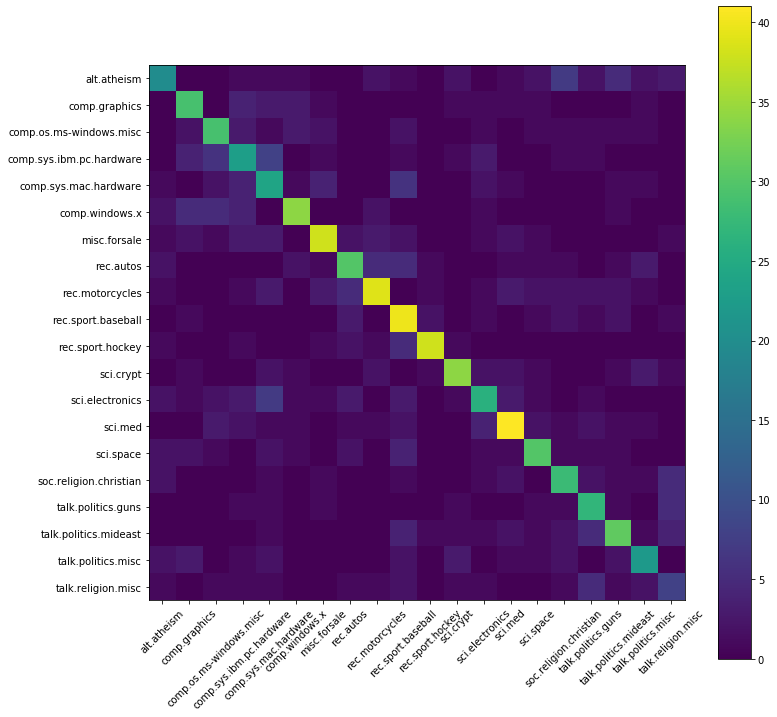

In [24]:
plt.figure(figsize=(12, 12))
plt.imshow(confusion_matrix)
plt.yticks(np.arange(len(dataset.target_names)), dataset.target_names)
plt.xticks(np.arange(len(dataset.target_names)), dataset.target_names, rotation=45)
plt.colorbar()

## Cross-validation
https://en.wikipedia.org/wiki/Cross-validation_(statistics)

In [ ]:
X, X_test, y, y_test = train_test_split(bows, targets, test_size=0.1, shuffle=False)

In [ ]:
X.shape, len(y), X_test.shape, len(y_test)

In [ ]:
svc = svm.LinearSVC()
svc.fit(X, y)
svc.score(X_test, y_test)

In [ ]:
X, X_test, y, y_test = train_test_split(bows, targets, test_size=0.1, shuffle=True)

In [ ]:
svc = svm.LinearSVC()
svc.fit(X, y)
svc.score(X_test, y_test)

### K-fold

In [ ]:
cross_val_score(svc, bows, targets, cv=10)

In [ ]:
cvr = cross_val_score(svc, bows, targets, cv=KFold(n_splits=10))
cvr.mean(), cvr.std()

### Shuffle and split

In [ ]:
cross_val_score(svc, bows, targets, cv=ShuffleSplit(n_splits=10, test_size=0.05))

# TF-IDF
https://en.wikipedia.org/wiki/Tf%E2%80%93idf

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=num_of_features, stop_words='english')

In [ ]:
bows = tfidf_vectorizer.fit_transform(corpus)
bows

In [ ]:
vocabulary = tfidf_vectorizer.get_feature_names()
vocabulary

In [ ]:
bows[100][bows[100].nonzero()]

In [ ]:
[vocabulary[ind] for ind in bows[100].nonzero()[1]]

In [ ]:
svc = svm.LinearSVC()
cross_val_score(svc, bows, targets, cv=10)

# Stemming

In [ ]:
stemmer = nltk.stem.PorterStemmer()

In [ ]:
lemmatizer = nltk.wordnet.WordNetLemmatizer()

In [ ]:
stemmer.stem('houses'), stemmer.stem('goes'), stemmer.stem('went'), stemmer.stem('mice')

In [ ]:
lemmatizer.lemmatize('houses'), lemmatizer.lemmatize('goes'), lemmatizer.lemmatize('went'), lemmatizer.lemmatize('mice')

## Helper class to transform words in the vectorizers

In [ ]:
class TransformTokenizer:
    def __init__(self, transform):
        self.transform = transform
        
    def __call__(self, doc):
        return [self.transform(word) for word in word_tokenize(doc)]

## Stemming

In [ ]:
tfidf_vectorizer_stemming = TfidfVectorizer(tokenizer=TransformTokenizer(stemmer.stem), max_df=0.95, min_df=2, max_features=num_of_features, stop_words='english')

In [ ]:
bows = tfidf_vectorizer_stemming.fit_transform(corpus)
bows

In [ ]:
vocabulary = tfidf_vectorizer_stemming.get_feature_names()
vocabulary

In [ ]:
bows[100][bows[100].nonzero()]

In [ ]:
[vocabulary[ind] for ind in bows[100].nonzero()[1]]

In [ ]:
svc = svm.LinearSVC()
cross_val_score(svc, bows, targets, cv=10)

# Grid search and randomized search

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'loss': ['hinge', 'squared_hinge']}

In [ ]:
X, X_test, y, y_test = train_test_split(bows, targets, test_size=0.1, shuffle=False)

In [ ]:
svc = svm.LinearSVC()
grid_search = GridSearchCV(svc, param_grid, n_jobs=-1, return_train_score=False)
grid_search.fit(X, y)

In [ ]:
import pandas as pd
pd.DataFrame(grid_search.cv_results_)

In [ ]:
grid_search.score(X_test, y_test)

In [ ]:
svc = svm.LinearSVC()
random_search = RandomizedSearchCV(svc, param_grid, n_iter=4, n_jobs=-1, return_train_score=False)
random_search.fit(X, y)

In [ ]:
import pandas as pd
pd.DataFrame(random_search.cv_results_)

In [ ]:
random_search.score(X_test, y_test)